## Ensemble Techniques

Ensemble techniques are an extremely popular set of algorithms which involves combining multiple base learners to create a hybrid model. This hybrid model performs better than any of it's constituent learners. The set up of the jupyter notebook is as follows:

1) Preprocessing: The data provided needs to cleaned before being fed into any classifier. The data is more or else clean from the start. However, proper precautions must be taken to avoid missing or NaN values. In this notebook, the range of values is re-calibrated to be between 0-1. Use df.fillna() to handle missing values.

2) Bagging(DT/RF): Bagging is the process of creating sub-divisions of the dataset randomly and apply basis functions on them. The final result is obtained by aggregating the individual results. Both decision trees and random forests are easy basis functions as visual comprehension of dividing the data is feasible. 

3) AdaBoost: AdaBoost is a meta-heuristic responsible for taking multiple weak basis functions and aggregating them into a overall strong classifier. In this solution n_estimators specify the number of models being trained. The overall measure-of-goodness is a measure of minimizing the exponential loss function.

4) GradientBoost: This is a generalized form of AdaBoost which provides a set of loss function to chose from.

5) XGBoost: It is similar to GradientBoosting, with the inclusion of Lasso and Ridge regularization techniques.

6) Setting hyperparameters: In all of the above techniques, the hyperparameters were set either as standard or after careful off-the-books consideration. However, how will we know which particular setting gives the best performance? For this, a set of parameters were appended in a list and the models were made to run on all of those combinations. A light version of Gradient Boosting (LGBM) is also included here. Cross-validation is conducted in a different way in this step, by considering all configurations in steps of 5.

7) Stacking: This involves training multiple models and combining them for better results. 

# Preprocessing


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from imblearn.ensemble import BalancedBaggingClassifier

df = pd.read_csv('breast_cancer_diagnosis.csv')
X = df.drop(['diagnosis'], axis = 1)
y = df['diagnosis']

cols = X.columns

In [17]:
import pandas as pd
from sklearn import preprocessing

x = X.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X = pd.DataFrame(x_scaled)

In [18]:
X.columns = cols

/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


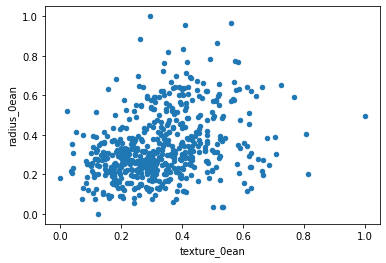

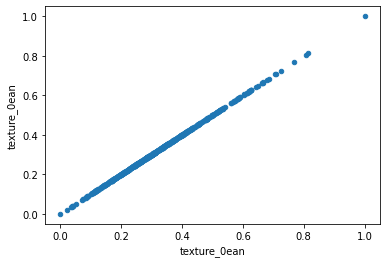

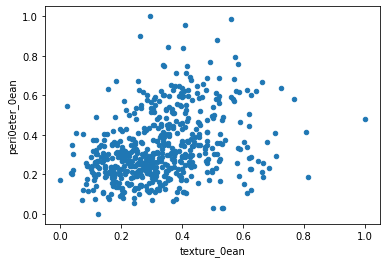

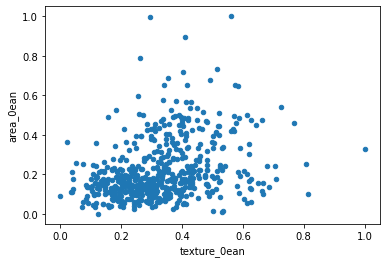

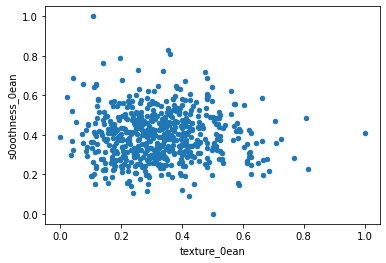

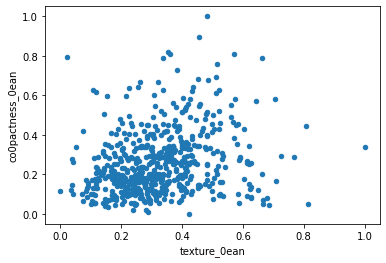

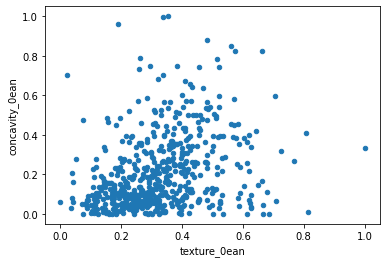

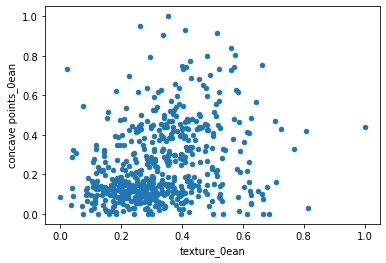

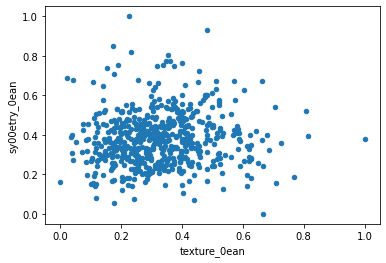

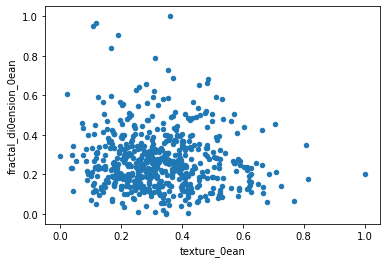

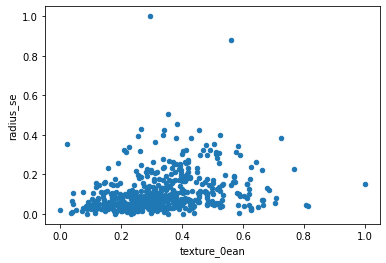

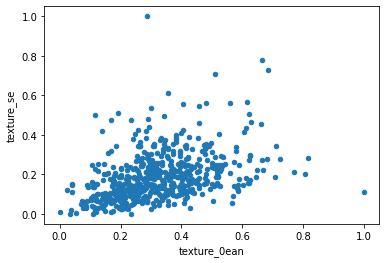

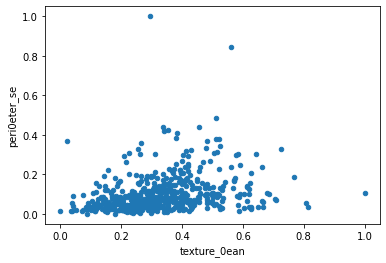

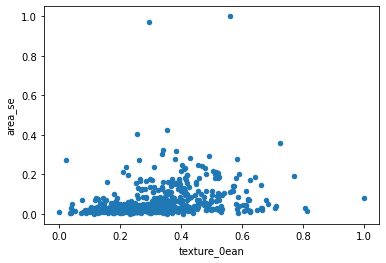

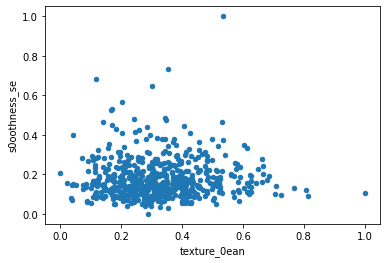

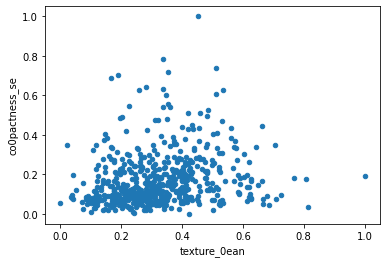

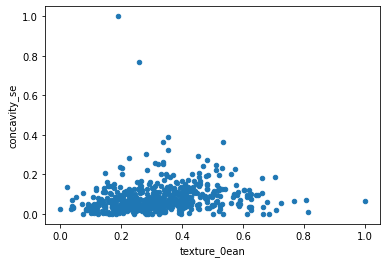

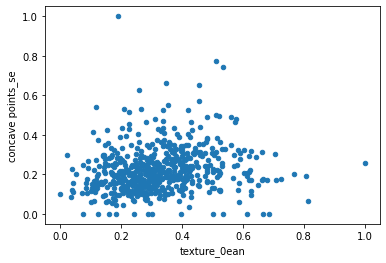

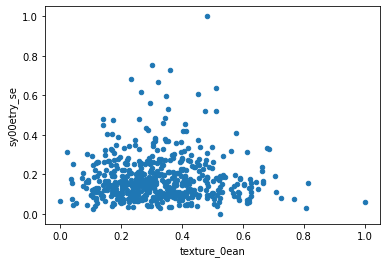

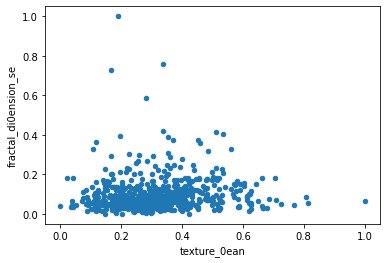

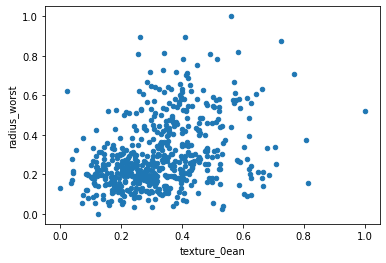

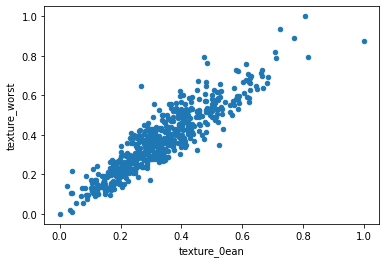

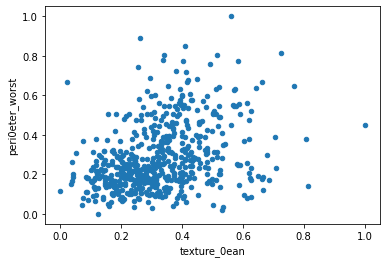

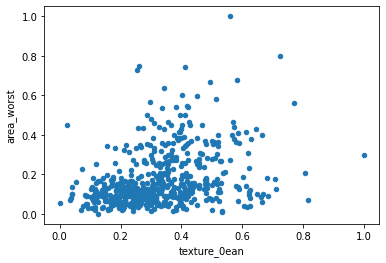

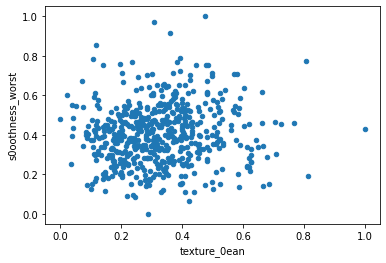

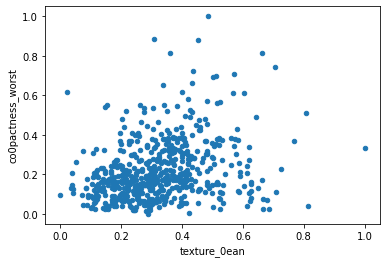

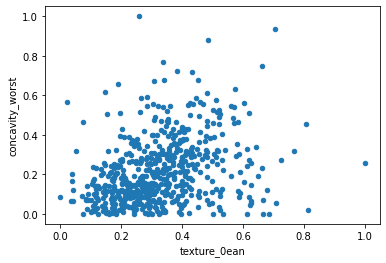

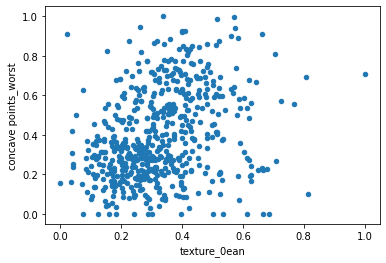

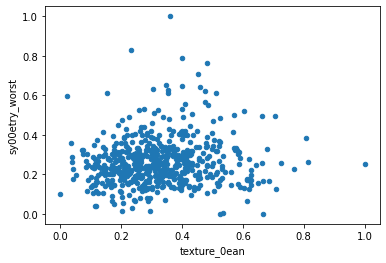

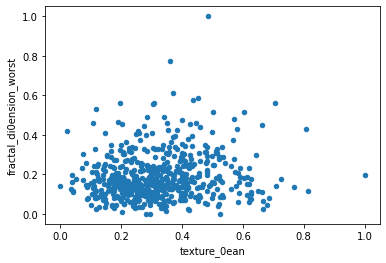

In [19]:
import matplotlib.pyplot as plt
cols = list(X.columns)
for i in cols:
    X.plot.scatter(x = 'texture_0ean', y = i)

# Bagging (Decision Tree)

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from imblearn.ensemble import BalancedBaggingClassifier


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [21]:
b = BaggingClassifier(base_estimator = DecisionTreeClassifier(),random_state = 0)
b.fit(X_train,y_train)

y_pred = b.predict(X_test)
acc = metrics.accuracy_score(y_test,y_pred)
print("Bagged Decision Tree Classifier's accuracy is ", acc)

bb = BalancedBaggingClassifier(base_estimator = DecisionTreeClassifier(),random_state = 0)
bb.fit(X_train,y_train)

by_pred = bb.predict(X_test)
bacc = balanced_accuracy_score(y_test,by_pred)

print("Balanced Bagged Decision Tree Classifier's accuracy is ", bacc)

Bagged Decision Tree Classifier's accuracy is  0.9440559440559441
Balanced Bagged Decision Tree Classifier's accuracy is  0.9401789429879317


# Bagging (Random Forest)

In [22]:
from imblearn.ensemble import BalancedRandomForestClassifier

brf = BalancedRandomForestClassifier(n_estimators=100, random_state=0)
brf.fit(X_train, y_train)

y_pred = brf.predict(X_test)
acc = balanced_accuracy_score(y_test, y_pred)

print("Balanced random forest's accuracy is : ", acc)

bb = BalancedBaggingClassifier(base_estimator = brf,random_state = 0)
bb.fit(X_train,y_train)

by_pred = bb.predict(X_test)
bacc = balanced_accuracy_score(y_test,by_pred)

print("Balanced Bagged Random Forest Classifier's accuracy is ", bacc)

Balanced random forest's accuracy is :  0.9831460674157304
Balanced Bagged Random Forest Classifier's accuracy is  0.9682688306283812


# Ada Boost

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [24]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

In [25]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)
ada_pred = ada_clf.predict(X_test)
print(metrics.accuracy_score(y_test, ada_pred))

0.896


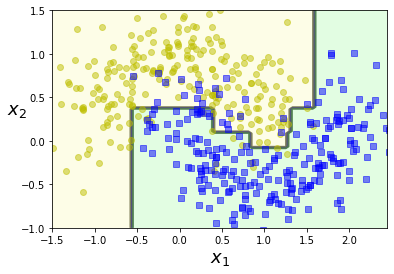

In [26]:
import numpy as np
import matplotlib.pyplot as plt
plot_decision_boundary(ada_clf, X, y)

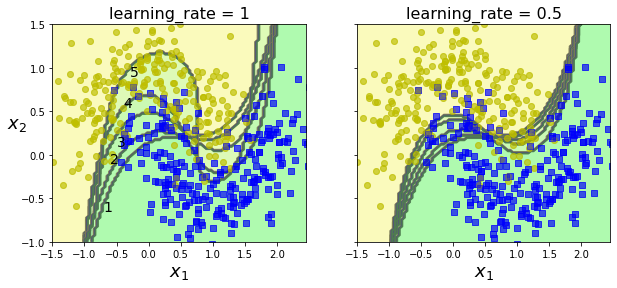

In [27]:
m = len(X_train)
from sklearn.svm import SVC
fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)
for subplot, learning_rate in ((0, 1), (1, 0.5)):
    sample_weights = np.ones(m)
    plt.sca(axes[subplot])
    for i in range(5):
        svm_clf = SVC(kernel="rbf", C=0.05, gamma="scale", random_state=42)
        svm_clf.fit(X_train, y_train, sample_weight=sample_weights)
        y_pred = svm_clf.predict(X_train)
        sample_weights[y_pred != y_train] *= (1 + learning_rate)
        plot_decision_boundary(svm_clf, X, y, alpha=0.2)
        plt.title("learning_rate = {}".format(learning_rate), fontsize=16)
    if subplot == 0:
        plt.text(-0.7, -0.65, "1", fontsize=14)
        plt.text(-0.6, -0.10, "2", fontsize=14)
        plt.text(-0.5,  0.10, "3", fontsize=14)
        plt.text(-0.4,  0.55, "4", fontsize=14)
        plt.text(-0.3,  0.90, "5", fontsize=14)
    else:
        plt.ylabel("")

plt.show()

# Gradient Boosting

In [28]:
from sklearn.ensemble import GradientBoostingRegressor
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics


gbrt = GradientBoostingRegressor(max_depth=10, n_estimators=3, learning_rate=0.1, random_state=42)
gbrt.fit(X_train, y_train)
gbrt_pred = gbrt.predict(X_test)
preds = []
for i in gbrt_pred:
    if i>0.5:
        preds.append(1)
    else:
        preds.append(0)
print('Accuracy of Gradient Booster')
print(metrics.accuracy_score(preds, y_test))

Accuracy of Gradient Booster
0.896


# XG Boosting

In [29]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

import time
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=100)

xgb.fit(X_train, y_train)
preds = xgb.predict(X_test)

acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100

print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))

/usr/lib/python3/dist-packages/dask/dataframe/utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


XGBoost's prediction accuracy is: 87.20


# Setting Hyperparameters

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from imblearn.ensemble import BalancedBaggingClassifier

df = pd.read_csv('breast_cancer_diagnosis.csv')
X = df.drop(['diagnosis'], axis = 1)
y = df['diagnosis']


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, 
                       model, param_grid, cv=10, scoring_fit='neg_mean_squared_error',
                       scoring_test=r2_score, do_probabilities = False):
    gs = GridSearchCV(
        estimator=model,
        param_grid=param_grid, 
        cv=cv, 
        n_jobs=-1, 
        scoring=scoring_fit,
        verbose=2
    )
    fitted_model = gs.fit(X_train_data, y_train_data)
    best_model = fitted_model.best_estimator_
    
    if do_probabilities:
      pred = fitted_model.predict_proba(X_test_data)
    else:
      pred = fitted_model.predict(X_test_data)
    
    score = scoring_test(y_test_data, pred)
    
    return [best_model, pred, score]


In [32]:
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
models_to_train = [XGBRegressor(), LGBMRegressor(), RandomForestRegressor()]

grid_parameters = [
    { 
        'n_estimators': [400, 700, 1000],
        'colsample_bytree': [0.7, 0.8],
        'max_depth': [15,20,25],
        'reg_alpha': [1.1, 1.2, 1.3],
        'reg_lambda': [1.1, 1.2, 1.3],
        'subsample': [0.7, 0.8, 0.9]
    },
    {
        'n_estimators': [400, 700, 1000],
        'learning_rate': [0.12],
        'colsample_bytree': [0.7, 0.8],
        'max_depth': [4],
        'num_leaves': [10, 20],
        'reg_alpha': [1.1, 1.2],
        'reg_lambda': [1.1, 1.2],
        'min_split_gain': [0.3, 0.4],
        'subsample': [0.8, 0.9],
        'subsample_freq': [10, 20]
    }, 
    { 
        'max_depth':[3, 5, 10, 13], 
        'n_estimators':[100, 200, 400, 600, 900],
        'max_features':[2, 4, 6, 8, 10]
    }
]


In [81]:
models_preds_scores = []

for i, model in enumerate(models_to_train):
    params = grid_parameters[i]
    
    result = algorithm_pipeline(X_train, X_test, y_train, y_test, 
                                 model, params, cv=5)
    models_preds_scores.append(result)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   27.6s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   57.1s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 2430 out of 2430 | elapsed:  6.0min finished


Fitting 5 folds for each of 384 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 686 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done 1252 tasks      | elapsed:   39.3s
[Parallel(n_jobs=-1)]: Done 1913 out of 1920 | elapsed:  1.0min remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   51.8s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  3.0min finished


In [82]:
for result in models_preds_scores:
    print('Model: {0}, Score: {1}'.format(type(result[0]).__name__, result[2]))


Model: XGBRegressor, Score: 0.8655361013551917
Model: LGBMRegressor, Score: 0.848006642903093
Model: RandomForestRegressor, Score: 0.8774978568456097


# Stacking

In [83]:
from mlxtend.regressor import StackingCVRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

xgb = XGBRegressor()
lgbm = LGBMRegressor()
rf = RandomForestRegressor()
ridge = Ridge()
lasso = Lasso()
svr = SVR(kernel='linear')


In [ ]:
stack = StackingCVRegressor(regressors=(ridge, lasso, svr, rf, lgbm, xgb),
                            meta_regressor=xgb, cv=12,
                            use_features_in_secondary=True,
                            store_train_meta_features=True,
                            shuffle=False,
                            random_state=42)

stack.fit(X_train, y_train)

X_test.columns = ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12']
pred = stack.predict(X_test)
score = r2_score(y_test, pred)